<a href="https://colab.research.google.com/github/barbarametzler/ClustViz/blob/master/Challenge_Geo_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!pip install geopandas
#!pip install folium
#!pip install sentinelsat

In [4]:
import numpy as np
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

**Part 1** - **Satellite Data** \
Given the AOI under this link:
https://drive.google.com/file/d/1cYulst52qOsx1VOOtVQo5sRdUugYqEpl/view?usp=sharing
\
Please create a multi-band GeoTIFF from all the spectral bands of a Sentinel-2 level 2A tile from any practical TOI (2019 or 2020), clipped to the extent of the AOI. \
a. Download the Satellite data (Free choice of provider/platform and downloading tool);\


In [15]:
m = folium.Map([52.6, 13.39], zoom_start=10)
aoi = '/content/remote_sensing_challenge_AOI.geojson'
bound = '/content/aoi_extent.geojson'
folium.GeoJson(aoi).add_to(m)
##calculated bound from aoi
folium.GeoJson(bound).add_to(m)
m

In [12]:
# connect to the API
user = 'abm_' ## change this!
password = 's19_PHMoChI' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [16]:
# search by polygon
footprint = geojson_to_wkt(read_geojson(bound))

print (footprint)

POLYGON((13.4806 52.4743,13.4806 52.6191,13.5745 52.6191,13.5745 52.4743,13.4806 52.4743))


In [33]:
products = api.query(footprint,
                     area_relation='Contains',
                     date = ('20190101', '20201231'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 5))

In [34]:
print(len(products))


37


In [35]:
api.to_geodataframe(products)

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,vegetationpercentage,notvegetatedpercentage,waterpercentage,unclassifiedpercentage,mediumprobacloudspercentage,highprobacloudspercentage,snowicepercentage,cloudcoverpercentage,level1cpdiidentifier,format,processingbaseline,platformname,filename,instrumentname,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
4a6351ac-8c60-4b13-b5c2-6cac19452e9f,S2B_MSIL2A_20201219T101329_N0214_R022_T33UUU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-12-19T10:13:29.024Z, Instrument: MS...",false,2020-12-19 10:13:29.024,2020-12-19 10:13:29.024,2020-12-19 16:51:42.060,19782,22,39.844260,4.716892,4.270060,25.745100,0.105014,0.031270,0.005510,1.000099,S2B_OPER_MSI_L1C_TL_EPAE_20201219T110853_A0197...,SAFE,02.14,Sentinel-2,S2B_MSIL2A_20201219T101329_N0214_R022_T33UUU_2...,Multi-Spectral Instrument,MSI,817.30 MB,GS2B_20201219T101329_019782_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20201219T101329_N0214_R022_T33UUU_2...,4a6351ac-8c60-4b13-b5c2-6cac19452e9f,"MULTIPOLYGON (((12.36673 52.23153, 13.67854 52..."
ff1b9399-b8cb-4ba3-8249-a25db5bf5dcf,S2B_MSIL2A_20200930T100729_N0214_R022_T33UUU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-09-30T10:07:29.024Z, Instrument: MS...",false,2020-09-30 10:07:29.024,2020-09-30 10:07:29.024,2020-09-30 23:01:15.887,18638,22,70.733213,18.676290,2.888135,1.707328,0.626086,0.954241,0.000173,3.716019,S2B_OPER_MSI_L1C_TL_EPAE_20200930T125951_A0186...,SAFE,02.14,Sentinel-2,S2B_MSIL2A_20200930T100729_N0214_R022_T33UUU_2...,Multi-Spectral Instrument,MSI,824.72 MB,GS2B_20200930T100729_018638_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200930T100729_N0214_R022_T33UUU_2...,ff1b9399-b8cb-4ba3-8249-a25db5bf5dcf,"MULTIPOLYGON (((12.36027 52.23141, 13.67854 52..."
e21260b0-d6c8-488a-8282-2d68dbe85847,S2A_MSIL2A_20200918T102031_N0214_R065_T33UUU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-09-18T10:20:31.024Z, Instrument: MS...",false,2020-09-18 10:20:31.024,2020-09-18 10:20:31.024,2020-09-18 16:41:23.561,27375,65,72.001779,20.581420,2.096817,0.474717,0.036629,0.048941,0.000196,3.892755,S2A_OPER_MSI_L1C_TL_EPAE_20200918T111753_A0273...,SAFE,02.14,Sentinel-2,S2A_MSIL2A_20200918T102031_N0214_R065_T33UUU_2...,Multi-Spectral Instrument,MSI,1.07 GB,GS2A_20200918T102031_027375_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200918T102031_N0214_R065_T33UUU_2...,e21260b0-d6c8-488a-8282-2d68dbe85847,"MULTIPOLYGON (((12.07160 52.22621, 13.67854 52..."
9686ba66-8ff6-4227-a090-797f400b7f3a,S2A_MSIL2A_20200816T101031_N0214_R022_T33UUU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-16T10:10:31.024Z, Instrument: MS...",false,2020-08-16 10:10:31.024,2020-08-16 10:10:31.024,2020-08-16 20:47:19.541,26903,22,68.721426,25.731534,3.108156,0.452304,0.141054,0.271351,0.000079,0.943033,S2A_OPER_MSI_L1C_TL_VGS2_20200816T122432_A0269...,SAFE,02.14,Sentinel-2,S2A_MSIL2A_20200816T101031_N0214_R022_T33UUU_2...,Multi-Spectral Instrument,MSI,834.18 MB,GS2A_20200816T101031_026903_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200816T101031_N0214_R022_T33UUU_2...,9686ba66-8ff6-4227-a090-797f400b7f3a,"MULTIPOLYGON (((12.35253 52.23127, 13.67854 52..."
9ae478da-37a6-4e16-93a1-df8dc5db39c3,S2B_MSIL2A_20200811T100559_N0214_R022_T33UUU_2...,https://scihub.copernicus.eu/dhus

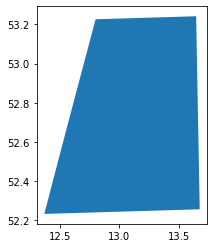

In [38]:
areas = api.to_geodataframe(products)
areas[0:1].plot(column='uuid', cmap=None)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


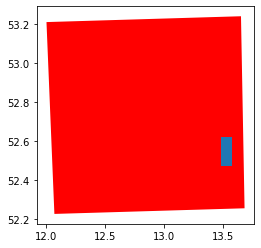

In [45]:
gdf2 = gpd.read_file(bound)
f, ax = plt.subplots(1)
areas[2:3].plot(ax=ax,column='uuid',color='r')
gdf2.plot(ax=ax)
plt.show()

In [46]:
areas[2:3]

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,vegetationpercentage,notvegetatedpercentage,waterpercentage,unclassifiedpercentage,mediumprobacloudspercentage,highprobacloudspercentage,snowicepercentage,cloudcoverpercentage,level1cpdiidentifier,format,processingbaseline,platformname,filename,instrumentname,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
e21260b0-d6c8-488a-8282-2d68dbe85847,S2A_MSIL2A_20200918T102031_N0214_R065_T33UUU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-09-18T10:20:31.024Z, Instrument: MS...",false,2020-09-18 10:20:31.024,2020-09-18 10:20:31.024,2020-09-18 16:41:23.561,27375,65,72.001779,20.58142,2.096817,0.474717,0.036629,0.048941,0.000196,3.892755,S2A_OPER_MSI_L1C_TL_EPAE_20200918T111753_A0273...,SAFE,02.14,Sentinel-2,S2A_MSIL2A_20200918T102031_N0214_R065_T33UUU_2...,Multi-Spectral Instrument,MSI,1.07 GB,GS2A_20200918T102031_027375_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200918T102031_N0214_R065_T33UUU_2...,e21260b0-d6c8-488a-8282-2d68dbe85847,"MULTIPOLYGON (((12.07160 52.22621, 13.67854 52..."


In [106]:
api.get_product_odata('e21260b0-d6c8-488a-8282-2d68dbe85847')
#api.get_product_odata('4a6351ac-8c60-4b13-b5c2-6cac19452e9f')

{'Creation Date': datetime.datetime(2020, 9, 18, 16, 41, 28, 940000),
 'Ingestion Date': datetime.datetime(2020, 9, 18, 16, 41, 23, 561000),
 'Online': False,
 'date': datetime.datetime(2020, 9, 18, 10, 20, 31, 24000),
 'footprint': 'POLYGON((12.004760925069467 53.21197782662703,13.648341514492438 53.24196354764364,13.678544065009483 52.25515074878083,12.071595116334858 52.22621087043558,12.004760925069467 53.21197782662703))',
 'id': 'e21260b0-d6c8-488a-8282-2d68dbe85847',
 'md5': 'ab637ecfa813e3e83fea63b0abb7bef0',
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('e21260b0-d6c8-488a-8282-2d68dbe85847')/Products('Quicklook')/$value",
 'size': 1145303099,
 'title': 'S2A_MSIL2A_20200918T102031_N0214_R065_T33UUU_20200918T120844',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('e21260b0-d6c8-488a-8282-2d68dbe85847')/$value"}

In [105]:
#api.download('e21260b0-d6c8-488a-8282-2d68dbe85847')
api.download('9686ba66-8ff6-4227-a090-797f400b7f3a')

LTATriggered: ignored

In [50]:
path_tozip = Out[12]['path'] ##notebook way - will not work in standalone script

KeyError: ignored

In [ ]:
import zipfile 

zip_ref = zipfile.ZipFile(path_tozip, 'r')
zip_ref.extractall(r'D:\sentinelsat')
zip_ref.close()

b. Mask unusable data with the Sentinel-2 SCL layer - Please convert all values of the S-2 spectral bands to nodata/NA values for which there are NO_DATA,
SATURATED_OR_DEFECTIVE, CLOUD_HIGH_PROBABILITY values in the S-2 SCL layer \
c. Store the result as a multiband Geotiff

**Part 2** - **Features** \
Use your image from part 1 to manipulate the image to display different ways of
exploring the data. If you weren’t able to complete part 1, you can use another publicly available earth observation image for the rest of the challenge. \
a. Run a feature detection algorithm on the image;\
b. Perform an edge detection algorithm on the image;\
c. Run a low-pass filter over the image.\
Provide a brief explanation of the operations, and what they might be used for.

Frequency Filter
\
When applying frequency filters to an image it is important to first convert the image to the frequency domain representation of the image. The Fourier transform (which decomposes a function into its sine and cosine components) can be applied to an image in order to obtain its frequency domain representation. The reason we are interested in an image’s frequency domain representation is that it is less expensive to apply frequency filters to an image in the frequency domain than it is to apply the filters in the spatial domain. This is due to the fact that each pixel in the frequency domain representation corresponds to a frequency rather than a location of the image.
Low pass filters and high pass filters are both frequency filters. The low pass filters preserves the lowest frequencies (that are below a threshold) which means it blurs the edges and removes speckle noise from the image in the spatial domain. The high pass filter preserves high frequencies which means it preserves edges. The ‘dft’ function determines the discrete Fourier transform of an image. For a N x N image the two dimensional discrete Fourier transform is given by:

where f is the image value in the spatial domain and F in its the frequency domain. The following is the formula for the inverse discrete Fourier transform (which converts an image from its frequency domain to the spatial domain):

Once a frequency filter is applied to an image, the inverse Fourier transform can be used to convert the image back to the spatial domain. Now the python implementation of the low pass filter will be given:


In [67]:
import tifffile as tiff
import cv2

a = tiff.imread('/content/Landsat_ETM_2001-08-26_multispectral.tif')
a.shape, a.dtype

((655, 791, 7), dtype('uint8'))

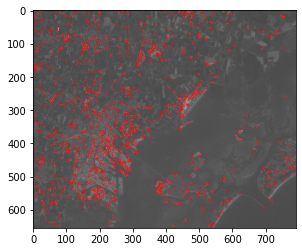

In [89]:
grey_img =  image2[:,:,0]
fast = cv2.FastFeatureDetector_create(threshold=25)

# find and draw the keypoints
kp = fast.detect(grey_img,None)
img2 = cv2.drawKeypoints(grey_img, kp, None,color=(255,0,0))
plt.imshow(img2)

In [95]:
img = a[:,:,0:3]

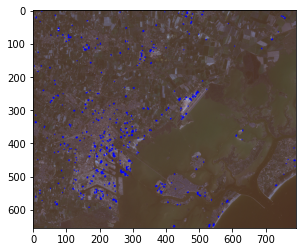

In [98]:
gray = np.float32(grey_img)
dst = cv2.cornerHarris(gray,2,3,0.04)
 
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
 
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
 
plt.imshow(img)

In [65]:
image2 = a.copy()

In [70]:
edges = cv2.Canny(image2,100,200)

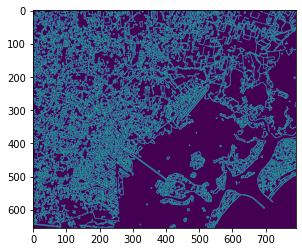

In [71]:
plt.imshow(edges)

In [75]:
image2.astype(np.float32).dtype

dtype('float32')

In [77]:
image2.shape

(655, 791, 7)

In [84]:
grey_img =  image2[:,:,0]

In [78]:
def low_pass_filtering(image, radius):
    """
         Low pass filter function
         :param image: input image
         :param radius: radius
         :return: filtering result
    """
         # Fourier transform the image, fft is a three-dimensional array, fft[:, :, 0] is the real part, fft[:, :, 1] is the imaginary part
    fft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
         # Centralize fft, the generated dshift is still a three-dimensional array
    dshift = np.fft.fftshift(fft)
 
         # Get the center pixel
    rows, cols = image.shape[:2]
    mid_row, mid_col = int(rows / 2), int(cols / 2)
 
         # Build mask, 256 bits, two channels
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[mid_row - radius:mid_row + radius, mid_col - radius:mid_col + radius] = 1
 
         # Multiply the Fourier transform result by a mask
    fft_filtering = dshift * mask
         # Inverse Fourier transform
    ishift = np.fft.ifftshift(fft_filtering)
    image_filtering = cv2.idft(ishift)
    image_filtering = cv2.magnitude(image_filtering[:, :, 0], image_filtering[:, :, 1])
         # Normalize the inverse transform results (generally normalize the last step of image processing, except in special cases)
    cv2.normalize(image_filtering, image_filtering, 0, 1, cv2.NORM_MINMAX)
    return image_filtering


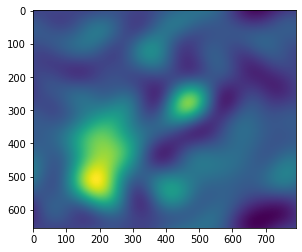

In [86]:
plt.imshow(low_pass_filtering(grey_img, 5))